In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# define the path to the csv file
csv_file_path = '/content/drive/MyDrive/BCG/transactions_dataset.csv.ccsv'

# define the chunksize
chunksize = 20000000  # change this value to adjust the chunk size

# create an empty list to store the result dataframes
result_dfs = []

# loop through the chunks of the csv file
for chunk in pd.read_csv(csv_file_path,sep=";", chunksize=chunksize):
    
    # group by column1 and column2, and sum column3
    grouped_df = chunk.groupby(['client_id', 'product_id']).agg({'sales_net':'sum'})

    # reset the index to turn the groupby result back into a dataframe
    result_df = grouped_df.reset_index()

    # append the result dataframe to the list
    result_dfs.append(result_df)

# concatenate the list of dataframes into a single dataframe
final_df = pd.concat(result_dfs, ignore_index=True)

# print the final dataframe
print(final_df)

          client_id  product_id  sales_net
0                 6       79016  884.12000
1                 6      184293    7.41888
2                 6      231597    7.88900
3                 6      482165    8.41800
4                 6      654297   87.21600
...             ...         ...        ...
34675464    2274456     2799312   31.98150
34675465    2274517     1362009   30.27720
34675466    2274517     2030665  117.86994
34675467    2274517     2756692  294.61206
34675468    2274517     2811481    7.54400

[34675469 rows x 3 columns]


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34675469 entries, 0 to 34675468
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   client_id   int64  
 1   product_id  int64  
 2   sales_net   float64
dtypes: float64(1), int64(2)
memory usage: 793.7 MB


In [11]:
clients_df = final_df.groupby(['client_id','product_id']).agg({'sales_net':'sum'}).reset_index()

In [12]:
clients_df = clients_df.sort_values(by=['client_id','sales_net'],ascending=False)
clients_df = clients_df.drop_duplicates(subset='client_id', keep='first')
clients_df


,client_id,product_id,sales_net
26558935,2274517,1452150,3772.666818
26558916,2274508,1253238,0.000000
26558912,2274504,1146070,53.902800
26558908,2274479,462354,121.605600
26558894,2274456,1298661,342.198907
...,...,...,...
5731,25,91564,211.083696
5519,18,2402641,8910.830200
519,14,323634,45420.492000
39,7,1109931,365.332000


In [13]:
df_2 = pd.read_parquet('/content/drive/MyDrive/Capstone/transactions_dataset.parquet',columns=['client_id','product_id','quantity','sales_net'])

In [14]:
df_2.query('product_id == "952179"')

,client_id,product_id,quantity,sales_net
63315589,325755,952179,81,-834.381836


In [15]:
price = df_2.loc[df_2['sales_net'] > 0]
price

,client_id,product_id,quantity,sales_net
0,188502,2376333,3,155.443207
1,835089,2520527,3,16.394400
2,1977896,2536756,21,365.766235
3,598816,3028673,201,8.598780
4,2086861,203377,3,1093.374023
...,...,...,...,...
63319301,1395153,359491,3,11.233200
63319302,1395153,2166255,9,26.082001
63319303,1395153,2789012,11,50.559521
63319311,880496,908253,1001,27.627600


In [16]:
price = price.groupby('product_id').agg({'quantity':'sum',
                                               'sales_net':['sum','count']}).reset_index()

price.columns = price.columns.map('{0[0]}{0[1]}'.format)
                              
price['price'] = price['sales_netsum']/price['quantitysum']
price

,product_id,quantitysum,sales_netsum,sales_netcount,price
0,1000104,369919,1.624503e+05,719,0.439151
1,1000204,9437,2.823505e+05,1031,29.919519
2,1000279,911,5.112532e+02,69,0.561200
3,1001117,948653,2.000142e+06,4155,2.108402
4,1001246,38560,5.982334e+04,1336,1.551435
...,...,...,...,...,...
607413,952179,0,0.000000e+00,0,NaN
607414,966918,11,1.833238e+03,1,166.658003
607415,969938,3,1.159200e+02,1,38.639999
607416,974872,3,2.290800e+02,1,76.360001


In [17]:
price = price.drop(columns='sales_netsum')
price

,product_id,quantitysum,sales_netcount,price
0,1000104,369919,719,0.439151
1,1000204,9437,1031,29.919519
2,1000279,911,69,0.561200
3,1001117,948653,4155,2.108402
4,1001246,38560,1336,1.551435
...,...,...,...,...
607413,952179,0,0,NaN
607414,966918,11,1,166.658003
607415,969938,3,1,38.639999
607416,974872,3,1,76.360001


In [18]:
 real_sales= df_2.groupby('product_id').agg({'sales_net':'sum'}).reset_index()

In [19]:
real_sales

,product_id,sales_net
0,1000104,1.574355e+05
1,1000204,2.572533e+05
2,1000279,5.112532e+02
3,1001117,1.887353e+06
4,1001246,5.829821e+04
...,...,...
607413,952179,-8.343818e+02
607414,966918,1.833238e+03
607415,969938,1.159200e+02
607416,974872,2.290800e+02


In [20]:
products = pd.merge(real_sales,price,on='product_id')

In [21]:
products = products.sort_values(by='sales_netcount',ascending=False)

In [22]:
products

,product_id,sales_net,quantitysum,sales_netcount,price
1977,1366829,2031155.75,17027307,525449,0.125657
10871,3000784,2237503.00,2294139,481757,1.039819
4843,1895362,3053492.25,19748257,476045,0.159825
2093,1390401,11303552.00,12208677,433325,0.952653
14421,738406,5386536.50,5610008,272496,0.984197
...,...,...,...,...,...
361694,146891,0.00,0,0,NaN
458256,340988,0.00,0,0,NaN
376527,1419259,0.00,0,0,NaN
376528,1423696,0.00,0,0,NaN


In [23]:
products['Percentage_count'] = (products['sales_netcount']/products['sales_netcount'].sum())*100

In [24]:
products['CumPercentagecount'] = products['Percentage_count'].cumsum()

In [25]:
products['product_type_count'] = np.where(products['CumPercentagecount'] <= 80, 'Product_A',
                 np.where((products['CumPercentagecount'] > 80) & (products['CumPercentagecount'] < 95), 'Product_B',
                 np.where(products['CumPercentagecount'] >= 95, 'Product_C', '')))

In [26]:
products

,product_id,sales_net,quantitysum,sales_netcount,price,Percentage_count,CumPercentagecount,product_type_count
1977,1366829,2031155.75,17027307,525449,0.125657,0.897980,0.897980,Product_A
10871,3000784,2237503.00,2294139,481757,1.039819,0.823311,1.721291,Product_A
4843,1895362,3053492.25,19748257,476045,0.159825,0.813550,2.534841,Product_A
2093,1390401,11303552.00,12208677,433325,0.952653,0.740542,3.275383,Product_A
14421,738406,5386536.50,5610008,272496,0.984197,0.465689,3.741072,Product_A
...,...,...,...,...,...,...,...,...
361694,146891,0.00,0,0,NaN,0.000000,100.000000,Product_C
458256,340988,0.00,0,0,NaN,0.000000,100.000000,Product_C
376527,1419259,0.00,0,0,NaN,0.000000,100.000000,Product_C
376528,1423696,0.00,0,0,NaN,0.000000,100.000000,Product_C


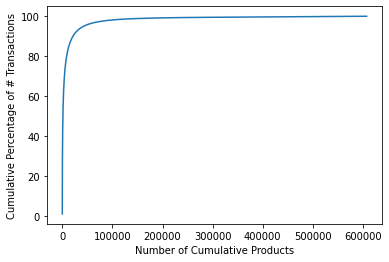

In [27]:
# Create a list of x-axis values
x_values = list(range(1, len(products) + 1))

# Plot the graph
plt.plot(x_values, products['CumPercentagecount'])

# Set the labels for the x and y axes
plt.xlabel('Number of Cumulative Products')
plt.ylabel('Cumulative Percentage of # Transactions')

# Show the plot
plt.show()

In [28]:
products['product_type_count'].value_counts()

Product_C    564846
Product_B     33915
Product_A      8657
Name: product_type_count, dtype: int64

In [29]:
products = products.sort_values(by='sales_net',ascending=False)

In [30]:
products

,product_id,sales_net,quantitysum,sales_netcount,price,Percentage_count,CumPercentagecount,product_type_count
9116,2681878,3.980162e+07,80476389,47897,0.506010,0.081855,19.205202,Product_A
12954,463156,2.488748e+07,74553154,46872,0.340690,0.080103,19.528660,Product_A
8324,2542409,2.337076e+07,37354177,129777,0.646766,0.221786,7.448831,Product_A
1353,1253061,2.271678e+07,497131,36455,48.060053,0.062301,23.825515,Product_A
1753,1325810,1.956379e+07,47058240,166040,0.427224,0.283758,6.452679,Product_A
...,...,...,...,...,...,...,...,...
126267,1343526,-6.458345e+03,0,0,NaN,0.000000,100.000000,Product_C
603038,495626,-7.705000e+03,0,0,NaN,0.000000,100.000000,Product_C
568266,2691931,-7.868705e+03,0,0,NaN,0.000000,100.000000,Product_C
213572,3142082,-2.064226e+04,0,0,NaN,0.000000,100.000000,Product_C


In [31]:
products['Percentage_money'] = (products['sales_net']/products['sales_net'].sum())*100

In [32]:
products['CumPercentagemoney'] = products['Percentage_money'].cumsum()

In [33]:
products['product_type_sum'] = np.where(products['CumPercentagemoney'] <= 80, 'Product_A',
                 np.where((products['CumPercentagemoney'] > 80) & (products['CumPercentagemoney'] < 95), 'Product_B',
                 np.where(products['CumPercentagemoney'] >= 95, 'Product_C', '')))

In [34]:
products

,product_id,sales_net,quantitysum,sales_netcount,price,Percentage_count,CumPercentagecount,product_type_count,Percentage_money,CumPercentagemoney,product_type_sum
9116,2681878,3.980162e+07,80476389,47897,0.506010,0.081855,19.205202,Product_A,0.424888,0.424888,Product_A
12954,463156,2.488748e+07,74553154,46872,0.340690,0.080103,19.528660,Product_A,0.265677,0.690565,Product_A
8324,2542409,2.337076e+07,37354177,129777,0.646766,0.221786,7.448831,Product_A,0.249486,0.940051,Product_A
1353,1253061,2.271678e+07,497131,36455,48.060053,0.062301,23.825515,Product_A,0.242505,1.182556,Product_A
1753,1325810,1.956379e+07,47058240,166040,0.427224,0.283758,6.452679,Product_A,0.208846,1.391402,Product_A
...,...,...,...,...,...,...,...,...,...,...,...
126267,1343526,-6.458345e+03,0,0,NaN,0.000000,100.000000,Product_C,-0.000069,99.827034,Product_C
603038,495626,-7.705000e+03,0,0,NaN,0.000000,100.000000,Product_C,-0.000082,99.826950,Product_C
568266,2691931,-7.868705e+03,0,0,NaN,0.000000,100.000000,Product_C,-0.000084,99.826866,Product_C
213572,3142082,-2.064226e+04,0,0,NaN,0.000000,100.000000,Product_C,-0.000220,99.826645,Product_C


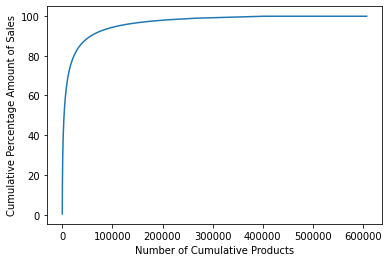

In [35]:
# Create a list of x-axis values
x_values = list(range(1, len(products) + 1))

# Plot the graph
plt.plot(x_values, products['CumPercentagemoney'])

# Set the labels for the x and y axes
plt.xlabel('Number of Cumulative Products')
plt.ylabel('Cumulative Percentage Amount of Sales')

# Show the plot
plt.show()

In [36]:
products['product_type_sum'].value_counts()

Product_C    495065
Product_B     89019
Product_A     23334
Name: product_type_sum, dtype: int64

In [37]:
#products.to_csv('/content/drive/MyDrive/Capstone/product_classification.csv',header=True)

In [38]:
clients_df

,client_id,product_id,sales_net
26558935,2274517,1452150,3772.666818
26558916,2274508,1253238,0.000000
26558912,2274504,1146070,53.902800
26558908,2274479,462354,121.605600
26558894,2274456,1298661,342.198907
...,...,...,...
5731,25,91564,211.083696
5519,18,2402641,8910.830200
519,14,323634,45420.492000
39,7,1109931,365.332000


In [39]:
products

,product_id,sales_net,quantitysum,sales_netcount,price,Percentage_count,CumPercentagecount,product_type_count,Percentage_money,CumPercentagemoney,product_type_sum
9116,2681878,3.980162e+07,80476389,47897,0.506010,0.081855,19.205202,Product_A,0.424888,0.424888,Product_A
12954,463156,2.488748e+07,74553154,46872,0.340690,0.080103,19.528660,Product_A,0.265677,0.690565,Product_A
8324,2542409,2.337076e+07,37354177,129777,0.646766,0.221786,7.448831,Product_A,0.249486,0.940051,Product_A
1353,1253061,2.271678e+07,497131,36455,48.060053,0.062301,23.825515,Product_A,0.242505,1.182556,Product_A
1753,1325810,1.956379e+07,47058240,166040,0.427224,0.283758,6.452679,Product_A,0.208846,1.391402,Product_A
...,...,...,...,...,...,...,...,...,...,...,...
126267,1343526,-6.458345e+03,0,0,NaN,0.000000,100.000000,Product_C,-0.000069,99.827034,Product_C
603038,495626,-7.705000e+03,0,0,NaN,0.000000,100.000000,Product_C,-0.000082,99.826950,Product_C
568266,2691931,-7.868705e+03,0,0,NaN,0.000000,100.000000,Product_C,-0.000084,99.826866,Product_C
213572,3142082,-2.064226e+04,0,0,NaN,0.000000,100.000000,Product_C,-0.000220,99.826645,Product_C


In [40]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607418 entries, 9116 to 603655
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   product_id          607418 non-null  category
 1   sales_net           607418 non-null  float32 
 2   quantitysum         607418 non-null  int32   
 3   sales_netcount      607418 non-null  int64   
 4   price               605575 non-null  float64 
 5   Percentage_count    607418 non-null  float64 
 6   CumPercentagecount  607418 non-null  float64 
 7   product_type_count  607418 non-null  object  
 8   Percentage_money    607418 non-null  float32 
 9   CumPercentagemoney  607418 non-null  float32 
 10  product_type_sum    607418 non-null  object  
dtypes: category(1), float32(3), float64(3), int32(1), int64(1), object(2)
memory usage: 64.8+ MB


In [41]:
clients_df['product_id'] = clients_df['product_id'].astype('int32')

In [42]:
products['product_id'] = products['product_id'].astype('int32')

In [43]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170589 entries, 26558935 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   client_id   170589 non-null  int64  
 1   product_id  170589 non-null  int32  
 2   sales_net   170589 non-null  float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 4.6 MB


In [44]:
df_merged = clients_df.merge(products[['product_id','product_type_sum']], on='product_id', how='left')

In [45]:
df_merged

,client_id,product_id,sales_net,product_type_sum
0,2274517,1452150,3772.666818,Product_A
1,2274508,1253238,0.000000,Product_A
2,2274504,1146070,53.902800,Product_A
3,2274479,462354,121.605600,Product_A
4,2274456,1298661,342.198907,Product_A
...,...,...,...,...
170584,25,91564,211.083696,Product_A
170585,18,2402641,8910.830200,Product_A
170586,14,323634,45420.492000,Product_B
170587,7,1109931,365.332000,Product_A


In [46]:
#df_merged.to_csv('/content/drive/MyDrive/Capstone/client_product_db.csv',header=True)